In [15]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [2]:
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


In [3]:
from keras.models import load_model
model = load_model('model60epoch.h5')

2023-02-13 13:01:22.375861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def load_and_prep_image(filename, img_shape = 48):
    img = cv2.imread(filename)
    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    for x,y,w,h in faces:
        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
        faces = faceCascade.detectMultiScale(roi_Img, 1.1, 4)
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]
    Img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Img= cv2.resize(Img,(img_shape,img_shape))
    Img = Img/255.
    return Img

In [5]:
Emotion_Classes = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [21]:
def pred_and_plot(filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0) , verbose=0)
    pred_class = class_names[pred.argmax()]
#     plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);



'Neutral'

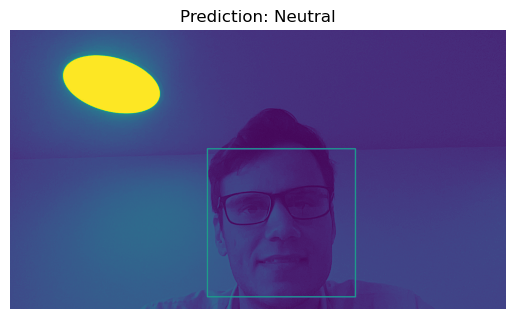

In [22]:
pred_and_plot("photo.jpg",Emotion_Classes)

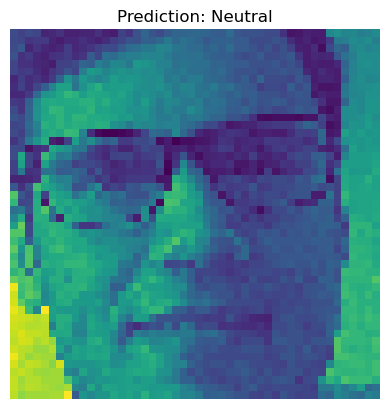

In [31]:
red_class=pred("photo.jpg",Emotion_Classes)

In [11]:
import cv2

def take_photo(filename='photo.jpg'):
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    cv2.imwrite(filename, frame)
    return filename

try:
    filename = take_photo()
    print("Saved to", filename)
except:
    print("Could not access webcam.")


Saved to photo.jpg


**Adding a button to capture the photo later**

In [30]:
from IPython.display import display, Javascript
from ipywidgets import widgets
cap = cv2.VideoCapture(0)
ret, frame = cap.read()


In [31]:
def save_image(b):
    ret, frame = cap.read()
    cv2.imwrite("captured_image2.jpg", frame)
    cap.release()
    cv2.destroyAllWindows()
    display(Javascript('window.alert("Image saved!")'))


In [32]:
button = widgets.Button(description="Capture")
button.on_click(save_image)
display(button)


**Music dataset**

In [16]:
music_df =pd.read_csv("data_moods.csv")

In [17]:
music_df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [18]:
music_df = music_df[['name','artist','mood','popularity']]
music_df.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [19]:
music_df["mood"].value_counts()

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

In [28]:
def pred(filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0) , verbose=0)
    pred_class = class_names[pred.argmax()]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);
    return pred_class

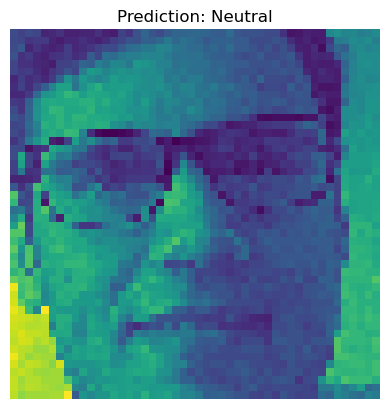

In [30]:
pred_class=pred("photo.jpg",Emotion_Classes)